In [1]:
%matplotlib inline

In [22]:
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats import norm
import numpy as np
from music21 import stream, clef, note, duration, midi

In [3]:
from acoustics.generator import pink, brown, white

In [4]:
def step(data, patterns, padding=None, padding_type=None):
    data = np.asarray(data, dtype=np.bool)
    assert len(data.shape) == 1
    patterns = np.asarray(patterns, dtype=np.bool)
    assert len(patterns.shape) == 2
    
    k = patterns.shape[1]
    
    if padding is None:
        padding = k // 2
        
    if padding_type is None:
        padding_type = lambda n, dtype: np.random.randint(0, 2, n, dtype=dtype)
    
    result = padding_type(data.shape[0], dtype=np.bool)
    for (p,), _ in np.ndenumerate(data[:-k]):
        result[padding + p] = np.any(np.all(patterns == data[p : p+k], axis=1))
    return result

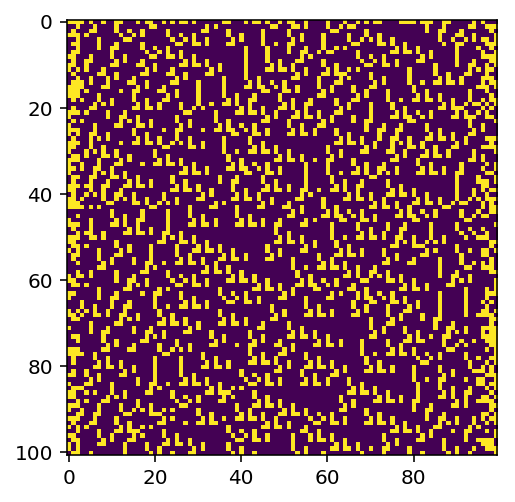

In [120]:
data = [np.random.randint(0, 2, 100, dtype=np.bool)]
patterns = np.random.randint(0, 2, (30, 7), dtype=np.bool)

for _ in range(100):
    data.append(step(data[-1], patterns))
plt.imshow(data)

In [129]:
scale = {
    20: "C3",
#     21: "C#3",
    22: "D3",
#     23: "D#3",
    24: "E3",
    25: "F3",
#     26: "F#3",
    27: "G3",
#     28: "G#3",
    29: "A3",
#     30: "A#3",
    31: "B3",
    32: "C4",
#     33: "C#4",
    34: "D4",
#     34: "D#4",
    35: "E4",
    36: "F4",
#     37: "F#4",
    38: "G4",
#     39: "G#4",
    40: "A4",
#     41: "A#4",
    42: "B4",
    43: "C5",
}

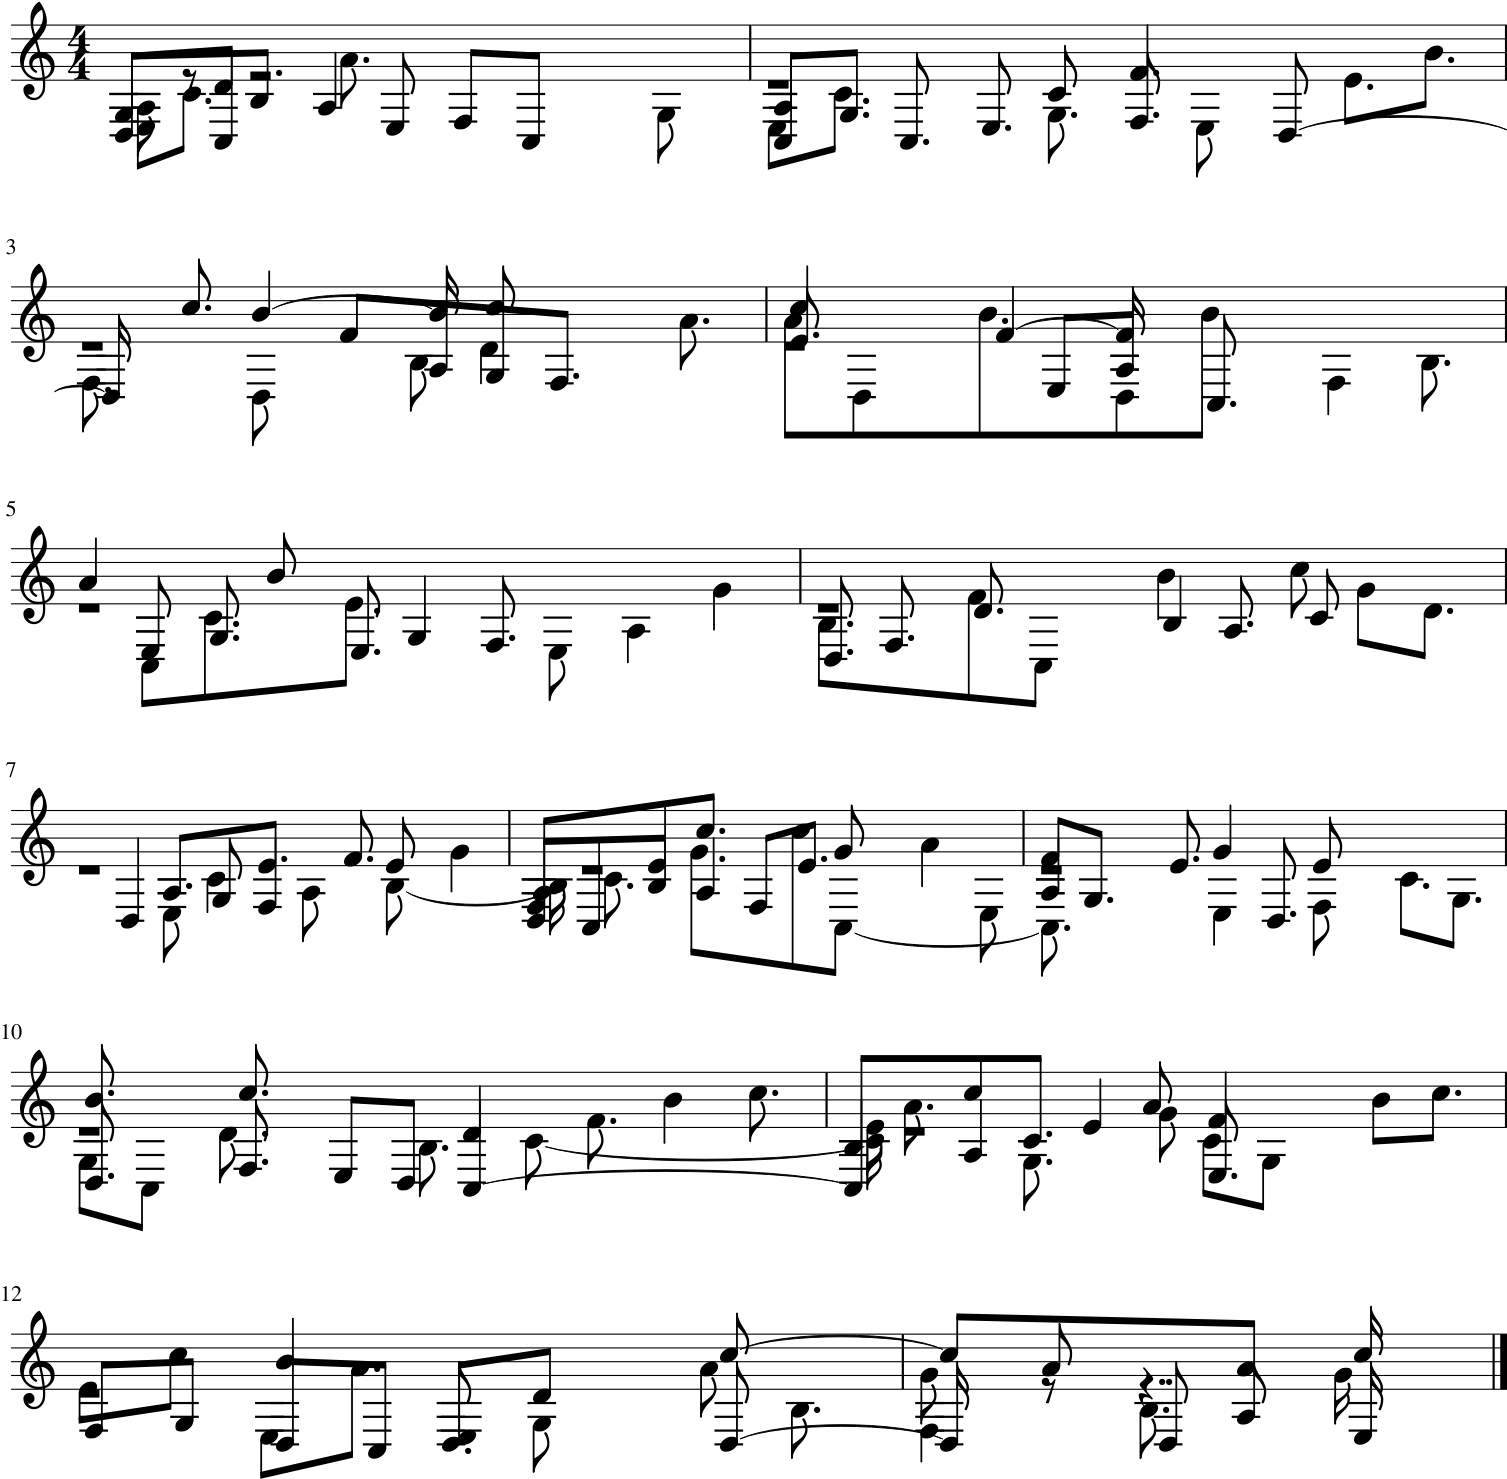

'out.mid'

In [130]:
s = stream.Stream()
c1 = clef.TrebleClef()
for pos in range(len(data)):
    for k in scale:
        if data[pos][k]:
            if pos == 0 or not data[pos-1][k]:
                d = 1
                while pos+d < len(data) and data[pos+d-1][k]:
                    d += 1
                n = note.Note(scale[k])
                n.duration = duration.Duration(d/4)
                s.insert(pos/2, n)
            
s.show()
s.write("midi", "out.mid")